In [17]:
from neural_denoiser import BinDenoiser
from negbin import RecordGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [18]:
maxbins = None
bsize = 16
denoiser = BinDenoiser(nblocks=5, ksize=17, filters=32)
inputs = tf.keras.Input(shape=(maxbins, 1), batch_size=bsize)
outputs = denoiser(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [19]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(12, None, 1)]           0         
_________________________________________________________________
bin_denoiser_2 (BinDenoiser) (12, None, 1)             7257      
Total params: 7,257
Trainable params: 7,257
Non-trainable params: 0
_________________________________________________________________


In [20]:
# model.load_weights("tmp.h5")

In [33]:
def lasso(x):
    nbins = tf.cast(tf.shape(x), tf.float32)[1]
    x = x * tf.math.sqrt(nbins)
    x = tf.reduce_mean(tf.math.abs(x))
    return 0.03 * x


def ridge(x):
    nbins = tf.cast(tf.shape(x), tf.float32)[1]
    x = tf.reduce_mean(x ** 2) * nbins
    return x


def tv(x):  
    x = tf.image.total_variation(x)
    x = tf.reduce_mean(x)
    return 0.0005 * x

def tv2(x):
    x0 = x[:,:-1,:]
    x1 = x[:,1:,:]
    out = tf.reduce_sum((x1 - x0)**2, 1)
    out = tf.reduce_mean(out)
    return out

def llhood(y, yhat):
    nbins = tf.cast(tf.shape(y), tf.float32)[1]
    loss = tf.reduce_mean((y - yhat)**2) * nbins
    return loss


def my_loss(y, yhat):
    ll = llhood(y, yhat)
    return ll + 0.2 * tv2(yhat) + 0.001 * ridge(yhat)

model.compile(optimizer=tf.keras.optimizers.Adam(
                learning_rate=5e-7,
                clipnorm=1.0),
              loss=my_loss)



In [34]:
# model.load_weights("tmp.h5")

In [35]:
def plot_test_case():
    data = generator.generate()
    h = np.arange(data['n_bins'])
    x = np.array(data['counts'], dtype=np.float32)
    x /= x.sum()
    y = data['signal_normalized']
    xinput = np.expand_dims(x, -1)
    xinput = np.expand_dims(xinput, 0)
    yhat = np.squeeze(model(tf.constant(xinput)).numpy())
    plt.bar(h, x, width=1)
    plt.plot(h, yhat, c="red")
    plt.plot(h, y, c="blue")
    return x, y, yhat

sim 1/100000, loss: 0.0279, losses_av: 0.0279, tv: 0.0139,  shrink: 0.0610, ll: 0.0251, nbins: 26


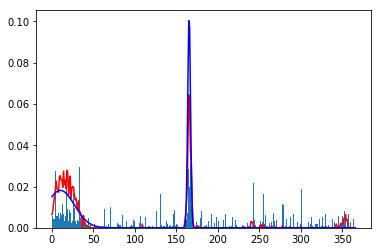

sim 10/100000, loss: 0.0033, losses_av: 0.0276, tv: 0.0138,  shrink: 0.0604, ll: 0.0248, nbins: 511
sim 20/100000, loss: 0.0114, losses_av: 0.0273, tv: 0.0136,  shrink: 0.0599, ll: 0.0245, nbins: 472
sim 30/100000, loss: 0.0105, losses_av: 0.0269, tv: 0.0135,  shrink: 0.0593, ll: 0.0242, nbins: 391
sim 40/100000, loss: 0.0084, losses_av: 0.0265, tv: 0.0133,  shrink: 0.0586, ll: 0.0238, nbins: 121
sim 50/100000, loss: 0.0040, losses_av: 0.0262, tv: 0.0132,  shrink: 0.0581, ll: 0.0235, nbins: 387
sim 60/100000, loss: 0.0157, losses_av: 0.0259, tv: 0.0131,  shrink: 0.0576, ll: 0.0233, nbins: 33
sim 70/100000, loss: 0.0317, losses_av: 0.0257, tv: 0.0129,  shrink: 0.0570, ll: 0.0230, nbins: 68
sim 80/100000, loss: 0.0069, losses_av: 0.0253, tv: 0.0128,  shrink: 0.0564, ll: 0.0227, nbins: 125
sim 90/100000, loss: 0.0040, losses_av: 0.0250, tv: 0.0127,  shrink: 0.0559, ll: 0.0224, nbins: 545
sim 100/100000, loss: 0.0090, losses_av: 0.0247, tv: 0.0125,  shrink: 0.0555, ll: 0.0221, nbins: 386


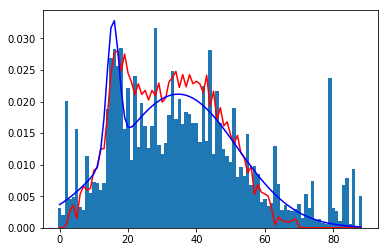

sim 110/100000, loss: 0.0107, losses_av: 0.0244, tv: 0.0124,  shrink: 0.0549, ll: 0.0218, nbins: 260
sim 120/100000, loss: 0.0036, losses_av: 0.0241, tv: 0.0123,  shrink: 0.0545, ll: 0.0216, nbins: 420
sim 130/100000, loss: 0.0037, losses_av: 0.0238, tv: 0.0122,  shrink: 0.0540, ll: 0.0213, nbins: 305
sim 140/100000, loss: 0.0108, losses_av: 0.0235, tv: 0.0121,  shrink: 0.0535, ll: 0.0210, nbins: 54
sim 150/100000, loss: 0.0042, losses_av: 0.0232, tv: 0.0120,  shrink: 0.0531, ll: 0.0207, nbins: 457
sim 160/100000, loss: 0.0029, losses_av: 0.0229, tv: 0.0118,  shrink: 0.0526, ll: 0.0204, nbins: 313
sim 170/100000, loss: 0.0044, losses_av: 0.0226, tv: 0.0117,  shrink: 0.0521, ll: 0.0202, nbins: 234
sim 180/100000, loss: 0.0100, losses_av: 0.0223, tv: 0.0116,  shrink: 0.0517, ll: 0.0199, nbins: 367
sim 190/100000, loss: 0.0047, losses_av: 0.0221, tv: 0.0115,  shrink: 0.0512, ll: 0.0197, nbins: 508
sim 200/100000, loss: 0.0075, losses_av: 0.0218, tv: 0.0114,  shrink: 0.0508, ll: 0.0194, nb

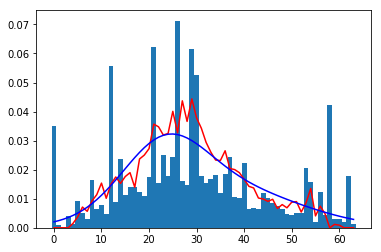

sim 210/100000, loss: 0.0030, losses_av: 0.0215, tv: 0.0112,  shrink: 0.0503, ll: 0.0192, nbins: 209
sim 220/100000, loss: 0.0157, losses_av: 0.0212, tv: 0.0111,  shrink: 0.0498, ll: 0.0190, nbins: 291
sim 230/100000, loss: 0.0084, losses_av: 0.0211, tv: 0.0110,  shrink: 0.0495, ll: 0.0188, nbins: 134
sim 240/100000, loss: 0.0133, losses_av: 0.0209, tv: 0.0109,  shrink: 0.0491, ll: 0.0186, nbins: 558
sim 250/100000, loss: 0.0089, losses_av: 0.0207, tv: 0.0109,  shrink: 0.0488, ll: 0.0185, nbins: 371
sim 260/100000, loss: 0.0043, losses_av: 0.0204, tv: 0.0108,  shrink: 0.0484, ll: 0.0182, nbins: 447
sim 270/100000, loss: 0.0099, losses_av: 0.0201, tv: 0.0106,  shrink: 0.0480, ll: 0.0179, nbins: 160
sim 280/100000, loss: 0.0051, losses_av: 0.0199, tv: 0.0106,  shrink: 0.0477, ll: 0.0177, nbins: 166
sim 290/100000, loss: 0.0051, losses_av: 0.0197, tv: 0.0105,  shrink: 0.0473, ll: 0.0175, nbins: 79
sim 300/100000, loss: 0.0094, losses_av: 0.0194, tv: 0.0104,  shrink: 0.0470, ll: 0.0173, nb

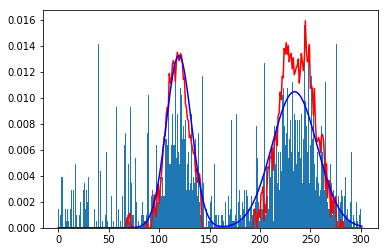

sim 310/100000, loss: 0.0072, losses_av: 0.0192, tv: 0.0103,  shrink: 0.0466, ll: 0.0171, nbins: 73
sim 320/100000, loss: 0.0051, losses_av: 0.0190, tv: 0.0103,  shrink: 0.0463, ll: 0.0169, nbins: 339
sim 330/100000, loss: 0.0193, losses_av: 0.0188, tv: 0.0102,  shrink: 0.0461, ll: 0.0167, nbins: 31
sim 340/100000, loss: 0.0112, losses_av: 0.0187, tv: 0.0102,  shrink: 0.0459, ll: 0.0166, nbins: 219
sim 350/100000, loss: 0.0073, losses_av: 0.0184, tv: 0.0101,  shrink: 0.0455, ll: 0.0164, nbins: 176
sim 360/100000, loss: 0.0023, losses_av: 0.0182, tv: 0.0100,  shrink: 0.0451, ll: 0.0162, nbins: 582
sim 370/100000, loss: 0.0179, losses_av: 0.0180, tv: 0.0099,  shrink: 0.0448, ll: 0.0160, nbins: 302
sim 380/100000, loss: 0.0045, losses_av: 0.0178, tv: 0.0098,  shrink: 0.0445, ll: 0.0158, nbins: 226
sim 390/100000, loss: 0.0046, losses_av: 0.0176, tv: 0.0098,  shrink: 0.0441, ll: 0.0156, nbins: 391
sim 400/100000, loss: 0.0051, losses_av: 0.0174, tv: 0.0097,  shrink: 0.0438, ll: 0.0154, nbi

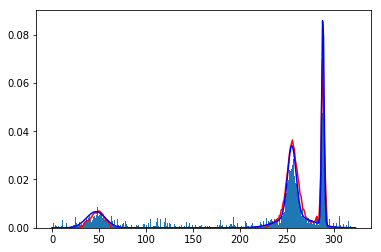

sim 410/100000, loss: 0.0052, losses_av: 0.0172, tv: 0.0096,  shrink: 0.0436, ll: 0.0153, nbins: 162
sim 420/100000, loss: 0.0085, losses_av: 0.0171, tv: 0.0096,  shrink: 0.0434, ll: 0.0151, nbins: 378
sim 430/100000, loss: 0.0044, losses_av: 0.0170, tv: 0.0095,  shrink: 0.0432, ll: 0.0150, nbins: 136
sim 440/100000, loss: 0.0235, losses_av: 0.0168, tv: 0.0094,  shrink: 0.0430, ll: 0.0149, nbins: 14
sim 450/100000, loss: 0.0120, losses_av: 0.0167, tv: 0.0094,  shrink: 0.0428, ll: 0.0148, nbins: 370
sim 460/100000, loss: 0.0051, losses_av: 0.0165, tv: 0.0093,  shrink: 0.0425, ll: 0.0146, nbins: 81
sim 470/100000, loss: 0.0100, losses_av: 0.0163, tv: 0.0093,  shrink: 0.0423, ll: 0.0144, nbins: 401
sim 480/100000, loss: 0.0022, losses_av: 0.0161, tv: 0.0092,  shrink: 0.0420, ll: 0.0143, nbins: 519
sim 490/100000, loss: 0.0077, losses_av: 0.0159, tv: 0.0091,  shrink: 0.0417, ll: 0.0141, nbins: 328
sim 500/100000, loss: 0.0046, losses_av: 0.0157, tv: 0.0090,  shrink: 0.0414, ll: 0.0139, nbi

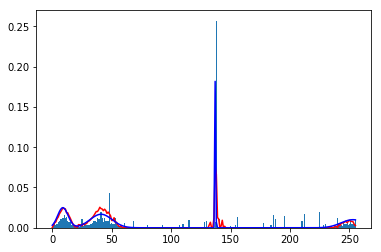

sim 510/100000, loss: 0.0080, losses_av: 0.0157, tv: 0.0091,  shrink: 0.0413, ll: 0.0139, nbins: 485
sim 520/100000, loss: 0.0053, losses_av: 0.0156, tv: 0.0090,  shrink: 0.0410, ll: 0.0137, nbins: 438
sim 530/100000, loss: 0.0026, losses_av: 0.0154, tv: 0.0090,  shrink: 0.0408, ll: 0.0136, nbins: 535
sim 540/100000, loss: 0.0100, losses_av: 0.0152, tv: 0.0090,  shrink: 0.0406, ll: 0.0134, nbins: 590
sim 550/100000, loss: 0.0022, losses_av: 0.0151, tv: 0.0089,  shrink: 0.0403, ll: 0.0133, nbins: 483
sim 560/100000, loss: 0.0030, losses_av: 0.0150, tv: 0.0089,  shrink: 0.0401, ll: 0.0131, nbins: 518
sim 570/100000, loss: 0.0021, losses_av: 0.0148, tv: 0.0088,  shrink: 0.0399, ll: 0.0130, nbins: 449
sim 580/100000, loss: 0.0103, losses_av: 0.0146, tv: 0.0088,  shrink: 0.0397, ll: 0.0129, nbins: 285
sim 590/100000, loss: 0.0108, losses_av: 0.0145, tv: 0.0087,  shrink: 0.0394, ll: 0.0127, nbins: 73
sim 600/100000, loss: 0.0041, losses_av: 0.0143, tv: 0.0086,  shrink: 0.0392, ll: 0.0125, nb

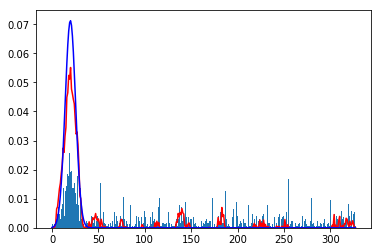

sim 610/100000, loss: 0.0033, losses_av: 0.0141, tv: 0.0086,  shrink: 0.0389, ll: 0.0124, nbins: 333
sim 620/100000, loss: 0.0098, losses_av: 0.0140, tv: 0.0086,  shrink: 0.0387, ll: 0.0123, nbins: 218
sim 630/100000, loss: 0.0053, losses_av: 0.0139, tv: 0.0085,  shrink: 0.0385, ll: 0.0122, nbins: 482
sim 640/100000, loss: 0.0022, losses_av: 0.0138, tv: 0.0084,  shrink: 0.0383, ll: 0.0121, nbins: 530
sim 650/100000, loss: 0.0202, losses_av: 0.0137, tv: 0.0084,  shrink: 0.0382, ll: 0.0120, nbins: 282
sim 660/100000, loss: 0.0049, losses_av: 0.0136, tv: 0.0084,  shrink: 0.0380, ll: 0.0119, nbins: 430
sim 670/100000, loss: 0.0073, losses_av: 0.0135, tv: 0.0083,  shrink: 0.0378, ll: 0.0118, nbins: 161
sim 680/100000, loss: 0.0047, losses_av: 0.0134, tv: 0.0083,  shrink: 0.0376, ll: 0.0117, nbins: 442
sim 690/100000, loss: 0.0032, losses_av: 0.0132, tv: 0.0082,  shrink: 0.0374, ll: 0.0116, nbins: 497
sim 700/100000, loss: 0.0098, losses_av: 0.0132, tv: 0.0083,  shrink: 0.0373, ll: 0.0115, n

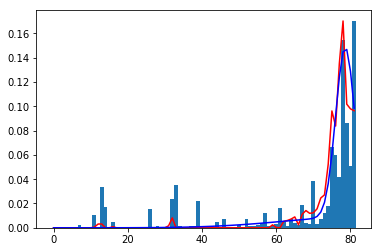

sim 710/100000, loss: 0.0077, losses_av: 0.0131, tv: 0.0083,  shrink: 0.0373, ll: 0.0114, nbins: 518
sim 720/100000, loss: 0.0071, losses_av: 0.0130, tv: 0.0082,  shrink: 0.0371, ll: 0.0113, nbins: 189
sim 730/100000, loss: 0.0027, losses_av: 0.0129, tv: 0.0082,  shrink: 0.0369, ll: 0.0112, nbins: 229
sim 740/100000, loss: 0.0030, losses_av: 0.0129, tv: 0.0082,  shrink: 0.0369, ll: 0.0112, nbins: 575
sim 750/100000, loss: 0.0057, losses_av: 0.0128, tv: 0.0081,  shrink: 0.0368, ll: 0.0111, nbins: 457
sim 760/100000, loss: 0.0033, losses_av: 0.0127, tv: 0.0081,  shrink: 0.0367, ll: 0.0111, nbins: 211
sim 770/100000, loss: 0.0030, losses_av: 0.0128, tv: 0.0081,  shrink: 0.0366, ll: 0.0111, nbins: 550
sim 780/100000, loss: 0.0057, losses_av: 0.0127, tv: 0.0081,  shrink: 0.0364, ll: 0.0110, nbins: 271
sim 790/100000, loss: 0.0034, losses_av: 0.0126, tv: 0.0081,  shrink: 0.0363, ll: 0.0110, nbins: 282
sim 800/100000, loss: 0.0065, losses_av: 0.0125, tv: 0.0080,  shrink: 0.0361, ll: 0.0109, n

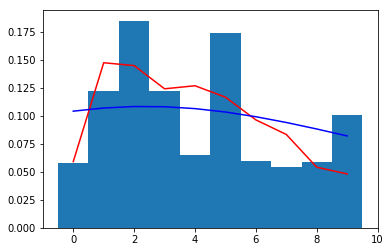

sim 810/100000, loss: 0.0067, losses_av: 0.0124, tv: 0.0080,  shrink: 0.0360, ll: 0.0108, nbins: 434
sim 820/100000, loss: 0.0064, losses_av: 0.0124, tv: 0.0080,  shrink: 0.0358, ll: 0.0107, nbins: 375
sim 830/100000, loss: 0.0049, losses_av: 0.0122, tv: 0.0079,  shrink: 0.0357, ll: 0.0106, nbins: 264
sim 840/100000, loss: 0.0333, losses_av: 0.0122, tv: 0.0080,  shrink: 0.0357, ll: 0.0106, nbins: 14
sim 850/100000, loss: 0.0023, losses_av: 0.0121, tv: 0.0079,  shrink: 0.0355, ll: 0.0105, nbins: 267
sim 860/100000, loss: 0.0029, losses_av: 0.0121, tv: 0.0079,  shrink: 0.0355, ll: 0.0105, nbins: 575
sim 870/100000, loss: 0.0116, losses_av: 0.0121, tv: 0.0079,  shrink: 0.0354, ll: 0.0105, nbins: 37
sim 880/100000, loss: 0.0032, losses_av: 0.0120, tv: 0.0079,  shrink: 0.0353, ll: 0.0104, nbins: 574
sim 890/100000, loss: 0.0174, losses_av: 0.0120, tv: 0.0079,  shrink: 0.0352, ll: 0.0104, nbins: 420
sim 900/100000, loss: 0.0059, losses_av: 0.0119, tv: 0.0078,  shrink: 0.0351, ll: 0.0103, nbi

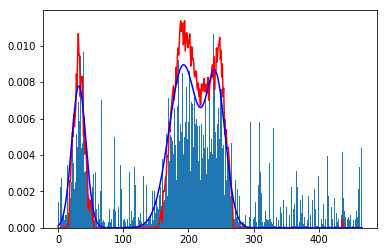

sim 910/100000, loss: 0.0130, losses_av: 0.0120, tv: 0.0079,  shrink: 0.0351, ll: 0.0103, nbins: 411
sim 920/100000, loss: 0.0070, losses_av: 0.0119, tv: 0.0079,  shrink: 0.0350, ll: 0.0103, nbins: 410
sim 930/100000, loss: 0.0049, losses_av: 0.0119, tv: 0.0079,  shrink: 0.0350, ll: 0.0103, nbins: 396
sim 940/100000, loss: 0.0058, losses_av: 0.0118, tv: 0.0078,  shrink: 0.0348, ll: 0.0102, nbins: 72
sim 950/100000, loss: 0.0152, losses_av: 0.0119, tv: 0.0079,  shrink: 0.0349, ll: 0.0103, nbins: 251
sim 960/100000, loss: 0.0095, losses_av: 0.0118, tv: 0.0078,  shrink: 0.0347, ll: 0.0102, nbins: 109
sim 970/100000, loss: 0.0087, losses_av: 0.0117, tv: 0.0078,  shrink: 0.0347, ll: 0.0101, nbins: 505
sim 980/100000, loss: 0.0072, losses_av: 0.0117, tv: 0.0078,  shrink: 0.0346, ll: 0.0101, nbins: 198
sim 990/100000, loss: 0.0028, losses_av: 0.0116, tv: 0.0078,  shrink: 0.0345, ll: 0.0100, nbins: 391
sim 1000/100000, loss: 0.0047, losses_av: 0.0115, tv: 0.0078,  shrink: 0.0344, ll: 0.0099, n

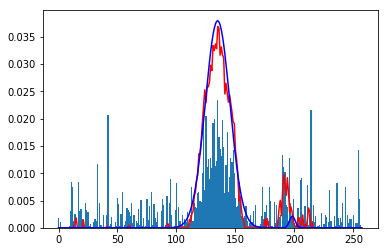

sim 1010/100000, loss: 0.0119, losses_av: 0.0115, tv: 0.0078,  shrink: 0.0344, ll: 0.0099, nbins: 272
sim 1020/100000, loss: 0.0082, losses_av: 0.0114, tv: 0.0078,  shrink: 0.0343, ll: 0.0098, nbins: 449
sim 1030/100000, loss: 0.0126, losses_av: 0.0113, tv: 0.0077,  shrink: 0.0341, ll: 0.0098, nbins: 135
sim 1040/100000, loss: 0.0057, losses_av: 0.0112, tv: 0.0077,  shrink: 0.0340, ll: 0.0096, nbins: 238
sim 1050/100000, loss: 0.0097, losses_av: 0.0112, tv: 0.0077,  shrink: 0.0341, ll: 0.0096, nbins: 45
sim 1060/100000, loss: 0.0078, losses_av: 0.0112, tv: 0.0077,  shrink: 0.0339, ll: 0.0096, nbins: 504
sim 1070/100000, loss: 0.0058, losses_av: 0.0111, tv: 0.0076,  shrink: 0.0338, ll: 0.0096, nbins: 362
sim 1080/100000, loss: 0.0026, losses_av: 0.0110, tv: 0.0076,  shrink: 0.0337, ll: 0.0095, nbins: 354
sim 1090/100000, loss: 0.0028, losses_av: 0.0110, tv: 0.0076,  shrink: 0.0336, ll: 0.0095, nbins: 517
sim 1100/100000, loss: 0.0053, losses_av: 0.0110, tv: 0.0076,  shrink: 0.0335, ll: 

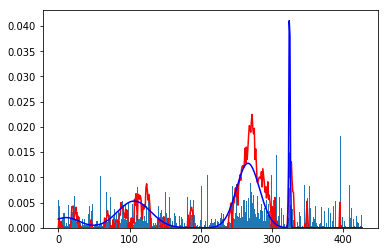

sim 1110/100000, loss: 0.0053, losses_av: 0.0109, tv: 0.0075,  shrink: 0.0334, ll: 0.0094, nbins: 102
sim 1120/100000, loss: 0.0071, losses_av: 0.0109, tv: 0.0075,  shrink: 0.0333, ll: 0.0093, nbins: 126
sim 1130/100000, loss: 0.0021, losses_av: 0.0108, tv: 0.0075,  shrink: 0.0332, ll: 0.0093, nbins: 441
sim 1140/100000, loss: 0.0052, losses_av: 0.0107, tv: 0.0074,  shrink: 0.0331, ll: 0.0092, nbins: 381
sim 1150/100000, loss: 0.0045, losses_av: 0.0107, tv: 0.0074,  shrink: 0.0329, ll: 0.0092, nbins: 498
sim 1160/100000, loss: 0.0106, losses_av: 0.0106, tv: 0.0074,  shrink: 0.0328, ll: 0.0091, nbins: 93
sim 1170/100000, loss: 0.0078, losses_av: 0.0106, tv: 0.0073,  shrink: 0.0328, ll: 0.0091, nbins: 53
sim 1180/100000, loss: 0.0045, losses_av: 0.0105, tv: 0.0073,  shrink: 0.0327, ll: 0.0090, nbins: 327
sim 1190/100000, loss: 0.0083, losses_av: 0.0105, tv: 0.0073,  shrink: 0.0327, ll: 0.0090, nbins: 486
sim 1200/100000, loss: 0.0176, losses_av: 0.0106, tv: 0.0073,  shrink: 0.0328, ll: 0

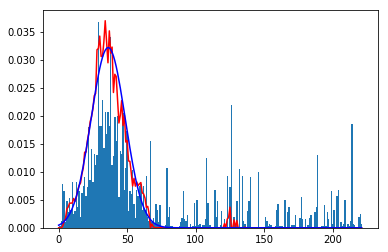

sim 1210/100000, loss: 0.0046, losses_av: 0.0105, tv: 0.0073,  shrink: 0.0327, ll: 0.0090, nbins: 597
sim 1220/100000, loss: 0.0048, losses_av: 0.0105, tv: 0.0074,  shrink: 0.0327, ll: 0.0090, nbins: 526
sim 1230/100000, loss: 0.0384, losses_av: 0.0105, tv: 0.0074,  shrink: 0.0328, ll: 0.0090, nbins: 20
sim 1240/100000, loss: 0.0050, losses_av: 0.0104, tv: 0.0074,  shrink: 0.0327, ll: 0.0089, nbins: 566
sim 1250/100000, loss: 0.0016, losses_av: 0.0104, tv: 0.0073,  shrink: 0.0326, ll: 0.0089, nbins: 564
sim 1260/100000, loss: 0.0073, losses_av: 0.0103, tv: 0.0074,  shrink: 0.0326, ll: 0.0088, nbins: 480
sim 1270/100000, loss: 0.0020, losses_av: 0.0103, tv: 0.0073,  shrink: 0.0325, ll: 0.0088, nbins: 495
sim 1280/100000, loss: 0.0055, losses_av: 0.0102, tv: 0.0073,  shrink: 0.0324, ll: 0.0087, nbins: 172
sim 1290/100000, loss: 0.0051, losses_av: 0.0101, tv: 0.0072,  shrink: 0.0322, ll: 0.0087, nbins: 411
sim 1300/100000, loss: 0.0039, losses_av: 0.0101, tv: 0.0072,  shrink: 0.0321, ll: 

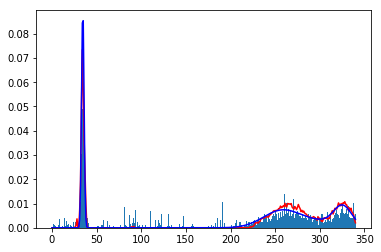

sim 1310/100000, loss: 0.0049, losses_av: 0.0100, tv: 0.0072,  shrink: 0.0320, ll: 0.0085, nbins: 504
sim 1320/100000, loss: 0.0075, losses_av: 0.0099, tv: 0.0071,  shrink: 0.0319, ll: 0.0085, nbins: 288
sim 1330/100000, loss: 0.0077, losses_av: 0.0099, tv: 0.0071,  shrink: 0.0319, ll: 0.0085, nbins: 63
sim 1340/100000, loss: 0.0037, losses_av: 0.0099, tv: 0.0071,  shrink: 0.0318, ll: 0.0084, nbins: 333
sim 1350/100000, loss: 0.0118, losses_av: 0.0098, tv: 0.0071,  shrink: 0.0317, ll: 0.0084, nbins: 141
sim 1360/100000, loss: 0.0045, losses_av: 0.0098, tv: 0.0071,  shrink: 0.0316, ll: 0.0083, nbins: 234
sim 1370/100000, loss: 0.0055, losses_av: 0.0097, tv: 0.0071,  shrink: 0.0316, ll: 0.0083, nbins: 159
sim 1380/100000, loss: 0.0033, losses_av: 0.0097, tv: 0.0071,  shrink: 0.0317, ll: 0.0083, nbins: 532
sim 1390/100000, loss: 0.0103, losses_av: 0.0097, tv: 0.0071,  shrink: 0.0317, ll: 0.0083, nbins: 70
sim 1400/100000, loss: 0.0054, losses_av: 0.0097, tv: 0.0071,  shrink: 0.0317, ll: 0

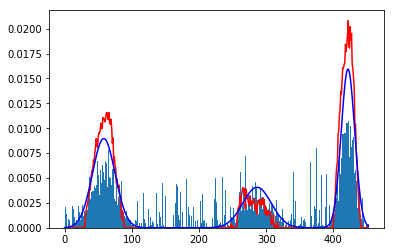

sim 1410/100000, loss: 0.0039, losses_av: 0.0097, tv: 0.0071,  shrink: 0.0318, ll: 0.0083, nbins: 591
sim 1420/100000, loss: 0.0098, losses_av: 0.0098, tv: 0.0071,  shrink: 0.0319, ll: 0.0083, nbins: 178
sim 1430/100000, loss: 0.0076, losses_av: 0.0097, tv: 0.0071,  shrink: 0.0318, ll: 0.0083, nbins: 386
sim 1440/100000, loss: 0.0033, losses_av: 0.0097, tv: 0.0071,  shrink: 0.0318, ll: 0.0083, nbins: 435
sim 1450/100000, loss: 0.0035, losses_av: 0.0097, tv: 0.0070,  shrink: 0.0317, ll: 0.0083, nbins: 152
sim 1460/100000, loss: 0.0158, losses_av: 0.0097, tv: 0.0070,  shrink: 0.0317, ll: 0.0082, nbins: 169
sim 1470/100000, loss: 0.0081, losses_av: 0.0097, tv: 0.0070,  shrink: 0.0317, ll: 0.0083, nbins: 195
sim 1480/100000, loss: 0.0288, losses_av: 0.0097, tv: 0.0071,  shrink: 0.0317, ll: 0.0083, nbins: 17
sim 1490/100000, loss: 0.0035, losses_av: 0.0097, tv: 0.0071,  shrink: 0.0318, ll: 0.0083, nbins: 364
sim 1500/100000, loss: 0.0053, losses_av: 0.0097, tv: 0.0071,  shrink: 0.0317, ll: 

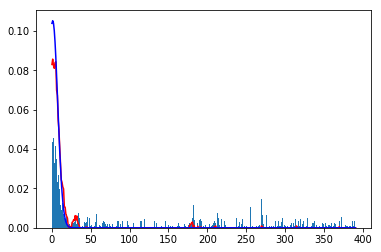

sim 1510/100000, loss: 0.0099, losses_av: 0.0097, tv: 0.0071,  shrink: 0.0318, ll: 0.0083, nbins: 434
sim 1520/100000, loss: 0.0038, losses_av: 0.0097, tv: 0.0071,  shrink: 0.0317, ll: 0.0082, nbins: 350
sim 1530/100000, loss: 0.0040, losses_av: 0.0096, tv: 0.0071,  shrink: 0.0317, ll: 0.0082, nbins: 560
sim 1540/100000, loss: 0.0035, losses_av: 0.0095, tv: 0.0070,  shrink: 0.0315, ll: 0.0081, nbins: 347
sim 1550/100000, loss: 0.0081, losses_av: 0.0095, tv: 0.0070,  shrink: 0.0314, ll: 0.0081, nbins: 384
sim 1560/100000, loss: 0.0040, losses_av: 0.0095, tv: 0.0070,  shrink: 0.0314, ll: 0.0080, nbins: 334
sim 1570/100000, loss: 0.0049, losses_av: 0.0096, tv: 0.0071,  shrink: 0.0316, ll: 0.0082, nbins: 223
sim 1580/100000, loss: 0.0248, losses_av: 0.0096, tv: 0.0071,  shrink: 0.0316, ll: 0.0082, nbins: 30
sim 1590/100000, loss: 0.0476, losses_av: 0.0096, tv: 0.0071,  shrink: 0.0318, ll: 0.0082, nbins: 11
sim 1600/100000, loss: 0.0091, losses_av: 0.0096, tv: 0.0071,  shrink: 0.0317, ll: 0

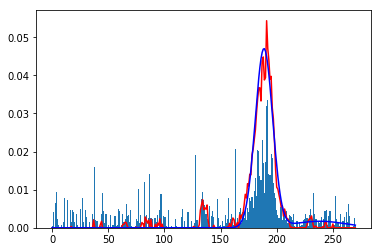

sim 1610/100000, loss: 0.0017, losses_av: 0.0095, tv: 0.0071,  shrink: 0.0316, ll: 0.0081, nbins: 432
sim 1620/100000, loss: 0.0148, losses_av: 0.0096, tv: 0.0071,  shrink: 0.0317, ll: 0.0081, nbins: 134
sim 1630/100000, loss: 0.0064, losses_av: 0.0095, tv: 0.0071,  shrink: 0.0316, ll: 0.0081, nbins: 105
sim 1640/100000, loss: 0.0072, losses_av: 0.0095, tv: 0.0071,  shrink: 0.0316, ll: 0.0080, nbins: 588
sim 1650/100000, loss: 0.0038, losses_av: 0.0095, tv: 0.0071,  shrink: 0.0316, ll: 0.0081, nbins: 471
sim 1660/100000, loss: 0.0163, losses_av: 0.0096, tv: 0.0072,  shrink: 0.0317, ll: 0.0081, nbins: 177
sim 1670/100000, loss: 0.0066, losses_av: 0.0096, tv: 0.0072,  shrink: 0.0317, ll: 0.0081, nbins: 126
sim 1680/100000, loss: 0.0073, losses_av: 0.0095, tv: 0.0071,  shrink: 0.0316, ll: 0.0081, nbins: 77
sim 1690/100000, loss: 0.0041, losses_av: 0.0095, tv: 0.0071,  shrink: 0.0316, ll: 0.0080, nbins: 284
sim 1700/100000, loss: 0.0076, losses_av: 0.0095, tv: 0.0071,  shrink: 0.0318, ll: 

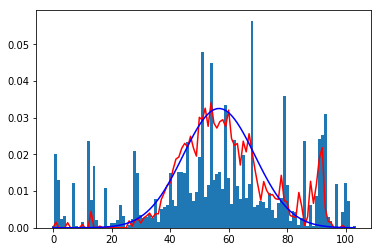

sim 1710/100000, loss: 0.0046, losses_av: 0.0095, tv: 0.0071,  shrink: 0.0317, ll: 0.0080, nbins: 467
sim 1720/100000, loss: 0.0079, losses_av: 0.0094, tv: 0.0071,  shrink: 0.0317, ll: 0.0080, nbins: 58
sim 1730/100000, loss: 0.0030, losses_av: 0.0095, tv: 0.0071,  shrink: 0.0317, ll: 0.0080, nbins: 325
sim 1740/100000, loss: 0.0054, losses_av: 0.0094, tv: 0.0071,  shrink: 0.0316, ll: 0.0080, nbins: 439
sim 1750/100000, loss: 0.0088, losses_av: 0.0093, tv: 0.0070,  shrink: 0.0315, ll: 0.0079, nbins: 75
sim 1760/100000, loss: 0.0131, losses_av: 0.0093, tv: 0.0070,  shrink: 0.0315, ll: 0.0079, nbins: 259
sim 1770/100000, loss: 0.0120, losses_av: 0.0093, tv: 0.0070,  shrink: 0.0315, ll: 0.0079, nbins: 208
sim 1780/100000, loss: 0.0058, losses_av: 0.0093, tv: 0.0070,  shrink: 0.0315, ll: 0.0079, nbins: 356
sim 1790/100000, loss: 0.0079, losses_av: 0.0093, tv: 0.0070,  shrink: 0.0314, ll: 0.0078, nbins: 596
sim 1800/100000, loss: 0.0071, losses_av: 0.0093, tv: 0.0070,  shrink: 0.0314, ll: 0

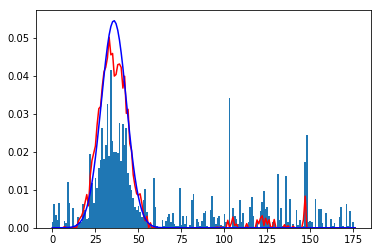

sim 1810/100000, loss: 0.0180, losses_av: 0.0092, tv: 0.0069,  shrink: 0.0312, ll: 0.0078, nbins: 74
sim 1820/100000, loss: 0.0061, losses_av: 0.0092, tv: 0.0069,  shrink: 0.0311, ll: 0.0078, nbins: 221
sim 1830/100000, loss: 0.0031, losses_av: 0.0091, tv: 0.0069,  shrink: 0.0311, ll: 0.0077, nbins: 589
sim 1840/100000, loss: 0.0054, losses_av: 0.0092, tv: 0.0069,  shrink: 0.0312, ll: 0.0077, nbins: 155
sim 1850/100000, loss: 0.0047, losses_av: 0.0091, tv: 0.0069,  shrink: 0.0311, ll: 0.0077, nbins: 223
sim 1860/100000, loss: 0.0189, losses_av: 0.0091, tv: 0.0069,  shrink: 0.0310, ll: 0.0077, nbins: 30
sim 1870/100000, loss: 0.0055, losses_av: 0.0091, tv: 0.0068,  shrink: 0.0310, ll: 0.0077, nbins: 135
sim 1880/100000, loss: 0.0055, losses_av: 0.0090, tv: 0.0068,  shrink: 0.0309, ll: 0.0076, nbins: 477
sim 1890/100000, loss: 0.0095, losses_av: 0.0091, tv: 0.0069,  shrink: 0.0310, ll: 0.0077, nbins: 169
sim 1900/100000, loss: 0.0075, losses_av: 0.0091, tv: 0.0069,  shrink: 0.0309, ll: 0

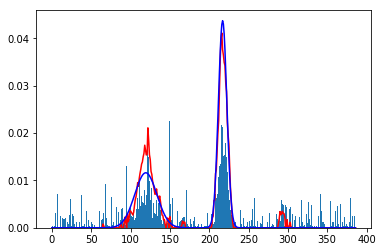

sim 1910/100000, loss: 0.0224, losses_av: 0.0091, tv: 0.0069,  shrink: 0.0309, ll: 0.0077, nbins: 416
sim 1920/100000, loss: 0.0217, losses_av: 0.0091, tv: 0.0069,  shrink: 0.0308, ll: 0.0077, nbins: 66
sim 1930/100000, loss: 0.0058, losses_av: 0.0090, tv: 0.0068,  shrink: 0.0308, ll: 0.0076, nbins: 291
sim 1940/100000, loss: 0.0085, losses_av: 0.0090, tv: 0.0068,  shrink: 0.0307, ll: 0.0076, nbins: 93
sim 1950/100000, loss: 0.0074, losses_av: 0.0090, tv: 0.0068,  shrink: 0.0306, ll: 0.0076, nbins: 570
sim 1960/100000, loss: 0.0117, losses_av: 0.0090, tv: 0.0068,  shrink: 0.0306, ll: 0.0076, nbins: 358
sim 1970/100000, loss: 0.0069, losses_av: 0.0090, tv: 0.0068,  shrink: 0.0305, ll: 0.0076, nbins: 490
sim 1980/100000, loss: 0.0048, losses_av: 0.0090, tv: 0.0068,  shrink: 0.0306, ll: 0.0076, nbins: 427
sim 1990/100000, loss: 0.0049, losses_av: 0.0089, tv: 0.0068,  shrink: 0.0306, ll: 0.0075, nbins: 349
sim 2000/100000, loss: 0.0109, losses_av: 0.0090, tv: 0.0068,  shrink: 0.0305, ll: 0

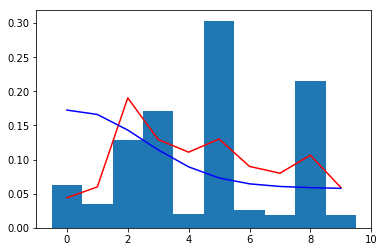

sim 2010/100000, loss: 0.0031, losses_av: 0.0089, tv: 0.0067,  shrink: 0.0305, ll: 0.0075, nbins: 392
sim 2020/100000, loss: 0.0055, losses_av: 0.0090, tv: 0.0068,  shrink: 0.0305, ll: 0.0076, nbins: 342
sim 2030/100000, loss: 0.0054, losses_av: 0.0089, tv: 0.0067,  shrink: 0.0304, ll: 0.0075, nbins: 175
sim 2040/100000, loss: 0.0234, losses_av: 0.0089, tv: 0.0067,  shrink: 0.0303, ll: 0.0075, nbins: 51
sim 2050/100000, loss: 0.0026, losses_av: 0.0089, tv: 0.0067,  shrink: 0.0304, ll: 0.0075, nbins: 320
sim 2060/100000, loss: 0.0080, losses_av: 0.0090, tv: 0.0067,  shrink: 0.0304, ll: 0.0076, nbins: 181
sim 2070/100000, loss: 0.0176, losses_av: 0.0089, tv: 0.0067,  shrink: 0.0303, ll: 0.0076, nbins: 93
sim 2080/100000, loss: 0.0026, losses_av: 0.0089, tv: 0.0067,  shrink: 0.0304, ll: 0.0075, nbins: 496
sim 2090/100000, loss: 0.0066, losses_av: 0.0089, tv: 0.0067,  shrink: 0.0303, ll: 0.0075, nbins: 483
sim 2100/100000, loss: 0.0037, losses_av: 0.0089, tv: 0.0066,  shrink: 0.0303, ll: 0

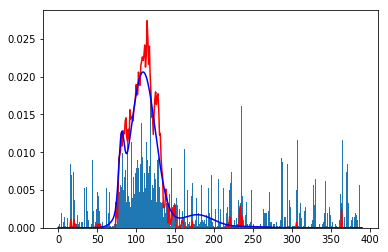

sim 2110/100000, loss: 0.0073, losses_av: 0.0089, tv: 0.0066,  shrink: 0.0303, ll: 0.0075, nbins: 125
sim 2120/100000, loss: 0.0136, losses_av: 0.0089, tv: 0.0066,  shrink: 0.0303, ll: 0.0075, nbins: 95
sim 2130/100000, loss: 0.0078, losses_av: 0.0089, tv: 0.0067,  shrink: 0.0303, ll: 0.0075, nbins: 175
sim 2140/100000, loss: 0.0058, losses_av: 0.0089, tv: 0.0066,  shrink: 0.0302, ll: 0.0075, nbins: 283
sim 2150/100000, loss: 0.0176, losses_av: 0.0089, tv: 0.0066,  shrink: 0.0301, ll: 0.0075, nbins: 237
sim 2160/100000, loss: 0.0034, losses_av: 0.0088, tv: 0.0067,  shrink: 0.0302, ll: 0.0075, nbins: 294
sim 2170/100000, loss: 0.0096, losses_av: 0.0088, tv: 0.0067,  shrink: 0.0302, ll: 0.0074, nbins: 231
sim 2180/100000, loss: 0.0076, losses_av: 0.0088, tv: 0.0068,  shrink: 0.0302, ll: 0.0074, nbins: 576
sim 2190/100000, loss: 0.0030, losses_av: 0.0088, tv: 0.0067,  shrink: 0.0301, ll: 0.0074, nbins: 207
sim 2200/100000, loss: 0.0048, losses_av: 0.0087, tv: 0.0067,  shrink: 0.0301, ll: 

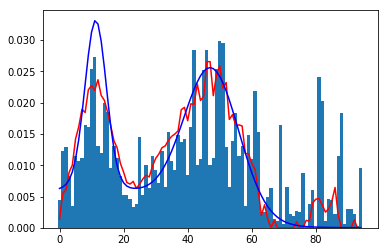

sim 2210/100000, loss: 0.0143, losses_av: 0.0087, tv: 0.0067,  shrink: 0.0301, ll: 0.0073, nbins: 40
sim 2220/100000, loss: 0.0503, losses_av: 0.0089, tv: 0.0067,  shrink: 0.0303, ll: 0.0075, nbins: 14
sim 2230/100000, loss: 0.0047, losses_av: 0.0088, tv: 0.0067,  shrink: 0.0303, ll: 0.0075, nbins: 131
sim 2240/100000, loss: 0.0112, losses_av: 0.0089, tv: 0.0068,  shrink: 0.0304, ll: 0.0075, nbins: 77
sim 2250/100000, loss: 0.0262, losses_av: 0.0090, tv: 0.0068,  shrink: 0.0305, ll: 0.0076, nbins: 85
sim 2260/100000, loss: 0.0098, losses_av: 0.0089, tv: 0.0068,  shrink: 0.0304, ll: 0.0075, nbins: 175
sim 2270/100000, loss: 0.0021, losses_av: 0.0090, tv: 0.0068,  shrink: 0.0306, ll: 0.0076, nbins: 381
sim 2280/100000, loss: 0.0061, losses_av: 0.0090, tv: 0.0068,  shrink: 0.0305, ll: 0.0076, nbins: 470
sim 2290/100000, loss: 0.0055, losses_av: 0.0090, tv: 0.0068,  shrink: 0.0304, ll: 0.0076, nbins: 195
sim 2300/100000, loss: 0.0194, losses_av: 0.0090, tv: 0.0067,  shrink: 0.0305, ll: 0.0

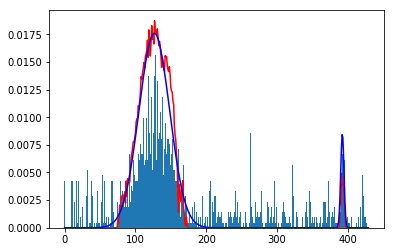

sim 2310/100000, loss: 0.0048, losses_av: 0.0089, tv: 0.0067,  shrink: 0.0304, ll: 0.0075, nbins: 449
sim 2320/100000, loss: 0.0095, losses_av: 0.0089, tv: 0.0067,  shrink: 0.0305, ll: 0.0075, nbins: 241
sim 2330/100000, loss: 0.0038, losses_av: 0.0090, tv: 0.0068,  shrink: 0.0306, ll: 0.0076, nbins: 288
sim 2340/100000, loss: 0.0141, losses_av: 0.0089, tv: 0.0068,  shrink: 0.0305, ll: 0.0076, nbins: 449
sim 2350/100000, loss: 0.0118, losses_av: 0.0089, tv: 0.0067,  shrink: 0.0304, ll: 0.0075, nbins: 129
sim 2360/100000, loss: 0.0048, losses_av: 0.0088, tv: 0.0067,  shrink: 0.0304, ll: 0.0075, nbins: 313
sim 2370/100000, loss: 0.0040, losses_av: 0.0088, tv: 0.0067,  shrink: 0.0303, ll: 0.0074, nbins: 546
sim 2380/100000, loss: 0.0074, losses_av: 0.0088, tv: 0.0067,  shrink: 0.0304, ll: 0.0074, nbins: 88
sim 2390/100000, loss: 0.0100, losses_av: 0.0088, tv: 0.0067,  shrink: 0.0304, ll: 0.0074, nbins: 233
sim 2400/100000, loss: 0.0111, losses_av: 0.0088, tv: 0.0067,  shrink: 0.0303, ll: 

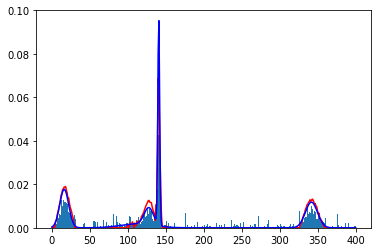

sim 2410/100000, loss: 0.0111, losses_av: 0.0088, tv: 0.0067,  shrink: 0.0302, ll: 0.0074, nbins: 169
sim 2420/100000, loss: 0.0036, losses_av: 0.0087, tv: 0.0067,  shrink: 0.0302, ll: 0.0074, nbins: 249
sim 2430/100000, loss: 0.0159, losses_av: 0.0087, tv: 0.0066,  shrink: 0.0301, ll: 0.0073, nbins: 31
sim 2440/100000, loss: 0.0040, losses_av: 0.0087, tv: 0.0066,  shrink: 0.0302, ll: 0.0073, nbins: 283
sim 2450/100000, loss: 0.0034, losses_av: 0.0086, tv: 0.0066,  shrink: 0.0301, ll: 0.0073, nbins: 260
sim 2460/100000, loss: 0.0109, losses_av: 0.0086, tv: 0.0066,  shrink: 0.0301, ll: 0.0072, nbins: 251
sim 2470/100000, loss: 0.0071, losses_av: 0.0085, tv: 0.0065,  shrink: 0.0300, ll: 0.0072, nbins: 236
sim 2480/100000, loss: 0.0153, losses_av: 0.0085, tv: 0.0065,  shrink: 0.0299, ll: 0.0072, nbins: 101
sim 2490/100000, loss: 0.0080, losses_av: 0.0085, tv: 0.0065,  shrink: 0.0299, ll: 0.0072, nbins: 195
sim 2500/100000, loss: 0.0345, losses_av: 0.0085, tv: 0.0065,  shrink: 0.0300, ll: 

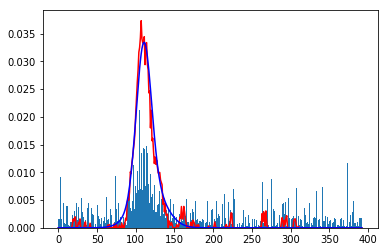

sim 2510/100000, loss: 0.0048, losses_av: 0.0085, tv: 0.0065,  shrink: 0.0299, ll: 0.0072, nbins: 297
sim 2520/100000, loss: 0.0052, losses_av: 0.0086, tv: 0.0066,  shrink: 0.0301, ll: 0.0072, nbins: 465
sim 2530/100000, loss: 0.0040, losses_av: 0.0086, tv: 0.0066,  shrink: 0.0301, ll: 0.0072, nbins: 455
sim 2540/100000, loss: 0.0176, losses_av: 0.0086, tv: 0.0066,  shrink: 0.0300, ll: 0.0073, nbins: 565
sim 2550/100000, loss: 0.0079, losses_av: 0.0086, tv: 0.0066,  shrink: 0.0300, ll: 0.0073, nbins: 527
sim 2560/100000, loss: 0.0419, losses_av: 0.0086, tv: 0.0065,  shrink: 0.0300, ll: 0.0073, nbins: 20
sim 2570/100000, loss: 0.0043, losses_av: 0.0086, tv: 0.0065,  shrink: 0.0299, ll: 0.0073, nbins: 270
sim 2580/100000, loss: 0.0025, losses_av: 0.0086, tv: 0.0065,  shrink: 0.0299, ll: 0.0072, nbins: 555
sim 2590/100000, loss: 0.0155, losses_av: 0.0086, tv: 0.0065,  shrink: 0.0300, ll: 0.0073, nbins: 24
sim 2600/100000, loss: 0.0120, losses_av: 0.0087, tv: 0.0065,  shrink: 0.0301, ll: 0

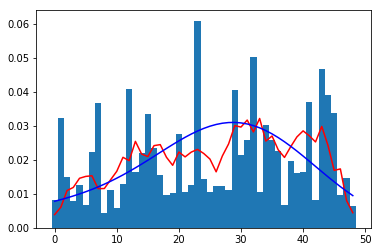

sim 2610/100000, loss: 0.0029, losses_av: 0.0086, tv: 0.0065,  shrink: 0.0301, ll: 0.0072, nbins: 575
sim 2620/100000, loss: 0.0060, losses_av: 0.0085, tv: 0.0065,  shrink: 0.0300, ll: 0.0072, nbins: 303
sim 2630/100000, loss: 0.0045, losses_av: 0.0085, tv: 0.0065,  shrink: 0.0299, ll: 0.0072, nbins: 545
sim 2640/100000, loss: 0.0056, losses_av: 0.0085, tv: 0.0065,  shrink: 0.0299, ll: 0.0071, nbins: 595
sim 2650/100000, loss: 0.0034, losses_av: 0.0085, tv: 0.0064,  shrink: 0.0298, ll: 0.0071, nbins: 578
sim 2660/100000, loss: 0.0018, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0298, ll: 0.0071, nbins: 595
sim 2670/100000, loss: 0.0030, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0297, ll: 0.0071, nbins: 111
sim 2680/100000, loss: 0.0088, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0297, ll: 0.0071, nbins: 333
sim 2690/100000, loss: 0.0071, losses_av: 0.0083, tv: 0.0064,  shrink: 0.0297, ll: 0.0070, nbins: 120
sim 2700/100000, loss: 0.0081, losses_av: 0.0083, tv: 0.0063,  shrink: 0.0296, ll:

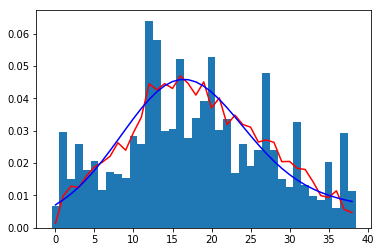

sim 2710/100000, loss: 0.0039, losses_av: 0.0083, tv: 0.0063,  shrink: 0.0296, ll: 0.0070, nbins: 500
sim 2720/100000, loss: 0.0045, losses_av: 0.0082, tv: 0.0063,  shrink: 0.0295, ll: 0.0070, nbins: 233
sim 2730/100000, loss: 0.0148, losses_av: 0.0082, tv: 0.0063,  shrink: 0.0295, ll: 0.0069, nbins: 51
sim 2740/100000, loss: 0.0080, losses_av: 0.0082, tv: 0.0063,  shrink: 0.0294, ll: 0.0069, nbins: 119
sim 2750/100000, loss: 0.0087, losses_av: 0.0082, tv: 0.0063,  shrink: 0.0295, ll: 0.0069, nbins: 77
sim 2760/100000, loss: 0.0082, losses_av: 0.0081, tv: 0.0063,  shrink: 0.0294, ll: 0.0068, nbins: 208
sim 2770/100000, loss: 0.0132, losses_av: 0.0082, tv: 0.0063,  shrink: 0.0295, ll: 0.0069, nbins: 60
sim 2780/100000, loss: 0.0098, losses_av: 0.0083, tv: 0.0063,  shrink: 0.0294, ll: 0.0070, nbins: 213
sim 2790/100000, loss: 0.0040, losses_av: 0.0083, tv: 0.0063,  shrink: 0.0295, ll: 0.0070, nbins: 581
sim 2800/100000, loss: 0.0132, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0296, ll: 0.

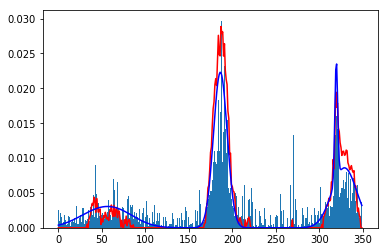

sim 2810/100000, loss: 0.0064, losses_av: 0.0084, tv: 0.0063,  shrink: 0.0296, ll: 0.0071, nbins: 332
sim 2820/100000, loss: 0.0035, losses_av: 0.0083, tv: 0.0063,  shrink: 0.0295, ll: 0.0070, nbins: 470
sim 2830/100000, loss: 0.0043, losses_av: 0.0083, tv: 0.0063,  shrink: 0.0296, ll: 0.0070, nbins: 331
sim 2840/100000, loss: 0.0101, losses_av: 0.0083, tv: 0.0063,  shrink: 0.0295, ll: 0.0070, nbins: 113
sim 2850/100000, loss: 0.0319, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0297, ll: 0.0071, nbins: 21
sim 2860/100000, loss: 0.0176, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0297, ll: 0.0071, nbins: 97
sim 2870/100000, loss: 0.0059, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0297, ll: 0.0071, nbins: 546
sim 2880/100000, loss: 0.0230, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0297, ll: 0.0071, nbins: 33
sim 2890/100000, loss: 0.0028, losses_av: 0.0085, tv: 0.0064,  shrink: 0.0298, ll: 0.0072, nbins: 179
sim 2900/100000, loss: 0.0040, losses_av: 0.0084, tv: 0.0063,  shrink: 0.0297, ll: 0.

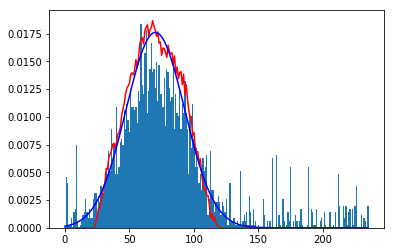

sim 2910/100000, loss: 0.0067, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0297, ll: 0.0071, nbins: 218
sim 2920/100000, loss: 0.0027, losses_av: 0.0084, tv: 0.0063,  shrink: 0.0297, ll: 0.0071, nbins: 581
sim 2930/100000, loss: 0.0169, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0298, ll: 0.0071, nbins: 240
sim 2940/100000, loss: 0.0060, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0299, ll: 0.0071, nbins: 560
sim 2950/100000, loss: 0.0026, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0298, ll: 0.0071, nbins: 194
sim 2960/100000, loss: 0.0122, losses_av: 0.0083, tv: 0.0064,  shrink: 0.0298, ll: 0.0070, nbins: 36
sim 2970/100000, loss: 0.0058, losses_av: 0.0083, tv: 0.0064,  shrink: 0.0297, ll: 0.0070, nbins: 123
sim 2980/100000, loss: 0.0077, losses_av: 0.0083, tv: 0.0064,  shrink: 0.0297, ll: 0.0070, nbins: 116
sim 2990/100000, loss: 0.0103, losses_av: 0.0082, tv: 0.0063,  shrink: 0.0296, ll: 0.0069, nbins: 62
sim 3000/100000, loss: 0.0049, losses_av: 0.0082, tv: 0.0063,  shrink: 0.0295, ll: 0

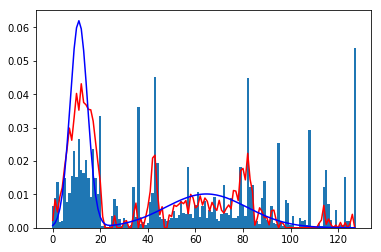

sim 3010/100000, loss: 0.0140, losses_av: 0.0083, tv: 0.0063,  shrink: 0.0296, ll: 0.0070, nbins: 482
sim 3020/100000, loss: 0.0050, losses_av: 0.0083, tv: 0.0063,  shrink: 0.0296, ll: 0.0070, nbins: 568
sim 3030/100000, loss: 0.0104, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0298, ll: 0.0071, nbins: 265
sim 3040/100000, loss: 0.0066, losses_av: 0.0085, tv: 0.0065,  shrink: 0.0299, ll: 0.0071, nbins: 359
sim 3050/100000, loss: 0.0036, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0298, ll: 0.0071, nbins: 533
sim 3060/100000, loss: 0.0134, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0298, ll: 0.0071, nbins: 53
sim 3070/100000, loss: 0.0157, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0298, ll: 0.0071, nbins: 58
sim 3080/100000, loss: 0.0030, losses_av: 0.0084, tv: 0.0063,  shrink: 0.0297, ll: 0.0071, nbins: 198
sim 3090/100000, loss: 0.0076, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0298, ll: 0.0071, nbins: 118
sim 3100/100000, loss: 0.0143, losses_av: 0.0085, tv: 0.0064,  shrink: 0.0299, ll: 0

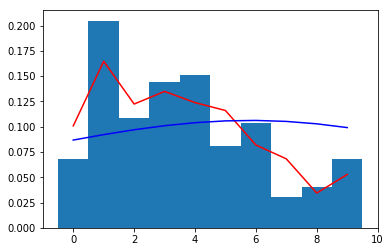

sim 3110/100000, loss: 0.0082, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0299, ll: 0.0071, nbins: 405
sim 3120/100000, loss: 0.0028, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0299, ll: 0.0071, nbins: 520
sim 3130/100000, loss: 0.0121, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0298, ll: 0.0071, nbins: 213
sim 3140/100000, loss: 0.0053, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0298, ll: 0.0071, nbins: 62
sim 3150/100000, loss: 0.0188, losses_av: 0.0085, tv: 0.0064,  shrink: 0.0298, ll: 0.0072, nbins: 142
sim 3160/100000, loss: 0.0209, losses_av: 0.0085, tv: 0.0064,  shrink: 0.0298, ll: 0.0072, nbins: 58
sim 3170/100000, loss: 0.0081, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0297, ll: 0.0071, nbins: 222
sim 3180/100000, loss: 0.0178, losses_av: 0.0085, tv: 0.0064,  shrink: 0.0297, ll: 0.0072, nbins: 369
sim 3190/100000, loss: 0.0010, losses_av: 0.0085, tv: 0.0064,  shrink: 0.0296, ll: 0.0072, nbins: 525
sim 3200/100000, loss: 0.0074, losses_av: 0.0085, tv: 0.0064,  shrink: 0.0296, ll: 0

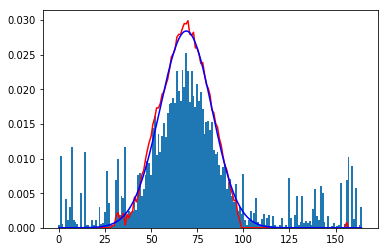

sim 3210/100000, loss: 0.0102, losses_av: 0.0085, tv: 0.0064,  shrink: 0.0296, ll: 0.0072, nbins: 462
sim 3220/100000, loss: 0.0059, losses_av: 0.0085, tv: 0.0064,  shrink: 0.0295, ll: 0.0072, nbins: 118
sim 3230/100000, loss: 0.0068, losses_av: 0.0085, tv: 0.0064,  shrink: 0.0296, ll: 0.0071, nbins: 420
sim 3240/100000, loss: 0.0145, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0295, ll: 0.0071, nbins: 253
sim 3250/100000, loss: 0.0075, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0296, ll: 0.0071, nbins: 403
sim 3260/100000, loss: 0.0078, losses_av: 0.0084, tv: 0.0064,  shrink: 0.0296, ll: 0.0071, nbins: 459
sim 3270/100000, loss: 0.0032, losses_av: 0.0085, tv: 0.0064,  shrink: 0.0297, ll: 0.0072, nbins: 499
sim 3280/100000, loss: 0.0019, losses_av: 0.0085, tv: 0.0064,  shrink: 0.0297, ll: 0.0072, nbins: 444
sim 3290/100000, loss: 0.0148, losses_av: 0.0086, tv: 0.0064,  shrink: 0.0296, ll: 0.0073, nbins: 511
sim 3300/100000, loss: 0.0040, losses_av: 0.0085, tv: 0.0064,  shrink: 0.0296, ll:

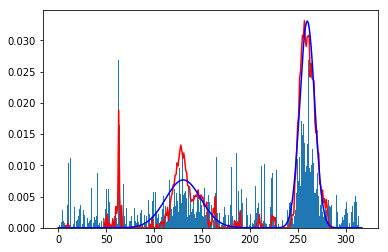

sim 3310/100000, loss: 0.0065, losses_av: 0.0085, tv: 0.0064,  shrink: 0.0295, ll: 0.0072, nbins: 460


In [ ]:
generator = RecordGenerator(n_obs=(1000, 10000),
                            noise_ratio=(0.2, 0.75),
                            noise_dispersion=(0.05, 1.0))
nsims = 100000
X = []
Y = []
losses = []
losses_av = []
lamb = 0.002
losses_av = []

bsize = 64

for sim in range(nsims):
    n_bins = np.random.randint(10, 601)
    Xbatch = []
    Ybatch = []
    for _ in range(bsize):
        data = generator.generate(n_bins=n_bins)
        x = np.array(data['counts'], dtype=np.float32)
        x /= x.sum()
        Xbatch.append(x)
        y = data['signal_normalized']
        Ybatch.append(y)
    Xbatch = tf.constant(np.expand_dims(np.stack(Xbatch, 0), -1), tf.float32)
    Ybatch = tf.constant(np.expand_dims(np.stack(Ybatch, 0), -1), tf.float32)
    loss = model.train_on_batch(Xbatch, Ybatch)
    losses.append(float(loss))
    if sim == 0:
        losses_av.append(float(loss))
        yhat = model(Xbatch)
        tv_ = tv2(yhat)
        shrink_ = ridge(yhat)
        ll_ = llhood(Ybatch, yhat)
    else:
        L = lamb * losses[-1] + (1.0 - lamb) * losses_av[-1]
        losses_av.append(L)

    yhat = model(Xbatch)
    tv_ += lamb * (tv2(yhat) - tv_)
    shrink_ += lamb * (ridge(yhat) - shrink_)
    ll_ += lamb * (llhood(Ybatch, yhat) - ll_)
        
    if sim == 0 or (sim + 1) % 10 == 0:
        print(f"sim {sim + 1}/{nsims}, loss: {losses[-1]:.4f}, ", end="")
        print(f"losses_av: {losses_av[-1]:.4f}, tv: {tv_:.4f}, ", end="")
        print(f" shrink: {shrink_:.4f}, ll: {ll_:.4f}, nbins: {n_bins}")

    if sim == 0 or (sim + 1) % 100 == 0:
        plot_test_case()
        plt.show()
        model.save_weights("tmp.h5")




In [ ]:

# plt.plot(losses)
plt.plot(losses_av, c="red")



In [ ]:
x, y, yhat = plot_test_case()

In [ ]:
plt.scatter(yhat, y)
plt.xlabel("prediction")
plt.ylabel("truth")
M = max(max(yhat), max(y))
plt.plot([0, M], [0, M], c="red")